In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [5]:
from sklearn.model_selection import train_test_split

# 使用工具对数据集切分，分为训练集和测试集
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=666)

# 使用工具对训练集切分，分为训练子集和验证集
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=888)


In [6]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [13]:
from sklearn.preprocessing import StandardScaler

# 进行特征工程，特征化
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [15]:
# 自定义损失函数
# 均方误差，传入参数分别为y_true真实结果，y_pred预测结果
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 搭建模型
# 设置模型各层，输入层，输出层
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

# 模型各层概述
model.summary()

# 编译模型，loss指定自定义的损失函数名
model.compile(loss=customized_mse, optimizer='sgd',
                metrics=['mean_squared_error'])

# 回调函数
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 训练模型
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid),
                   epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.8734 - mean_squared_error: 2.8734 - val_loss: 0.8950 - val_mean_squared_error: 0.8950
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4737 - mean_squared_error: 0.4737 - val_loss: 0.3974 - val_mean_squared_error: 0.3974
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4129 - mean_squared_error: 0.4129 - val_loss: 0.3847 - val_mean_squared_error: 0.3847
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3855 - mean_squared_error: 0.3855 - val_loss: 0.3676 - val_mean_squared_error: 0.3676
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4472 - mean_squared_error: 0.4472 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - mean_squared_error: 0.4862 - val_loss: 0.4244 - val_mean_squared_error: 0.4244
Epoch 7/100
363/363 [=

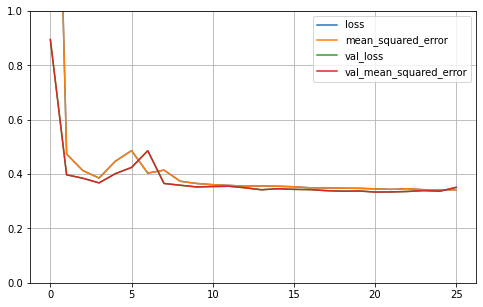

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [18]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.36584022641181946, 0.36584022641181946]